## **Email Spam Detection Project**  

This project focuses on creating a smart email spam detection system that leverages both content analysis and sender domain verification. By integrating these two approaches, the system effectively filters unwanted messages and helps protect users from various email-borne threats.


## How the System Works

- **Sender Domain Verification:**  
  Every incoming email is checked against a list of suspicious domains. Emails sent from domains frequently linked to spam are flagged immediately, providing a strong initial filter.

- **Content-Based Detection:**  
  At the core is a **Naive Bayes Classifier**, known for its efficiency and effectiveness in text-based tasks. The model calculates the likelihood that an email text is spam by using trained model on the given dataset. 

## Development & Evaluation

The classifier is trained on a labeled dataset containing examples of both spam and legitimate emails. Its performance is then evaluated using standard metrics—accuracy, precision, recall, and F1-score—to ensure dependable real-world results.

Importantly, the system is designed for interpretability. Users can review which features (domain or content cues) contributed to any given classification, supporting transparency and user trust.


## Goals

- Accurately identify and filter spam emails to improve inbox quality.
- Safeguard users from phishing, malware, and other cyber risks.
- Offer clear, understandable reasons for each spam decision.
- Maintain high efficiency and real-time operation.


## Technology Stack

The system is built in Python using these libraries:
- **NumPy** and **Pandas** for data processing.
- **Seaborn** for visualizations.
- **Scikit-learn** for machine learning and evaluation.
- **NLTK** for NLP tasks.


## Setup

Install the necessary Python libraries with:
```bash
pip install numpy pandas nltk scikit-learn seaborn


In [1]:
from nltk.tokenize import word_tokenize
import re
from collections import Counter


In [2]:
import nltk

# necessary import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\TSN-A0055\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Read and load the data

In [3]:
import pandas as pd
import kagglehub

path = kagglehub.dataset_download("balaka18/email-spam-classification-dataset-csv")
df = pd.read_csv(path+'/emails.csv')


# Data Preprocessing 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5172 entries, 0 to 5171
Columns: 3002 entries, Email No. to Prediction
dtypes: int64(3001), object(1)
memory usage: 118.5+ MB


Totally 3002 columns, 3000 columns for common words and 1 column as Prediction and one for Email No. 

In [5]:
df.head()

,Email No.,the,to,ect,and,for,of,a,you,hou,...,connevey,jay,valued,lay,infrastructure,military,allowing,ff,dry,Prediction
0,Email 1,0,0,1,0,0,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Email 2,8,13,24,6,6,2,102,1,27,...,0,0,0,0,0,0,0,1,0,0
2,Email 3,0,0,1,0,0,0,8,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Email 4,0,5,22,0,5,1,51,2,10,...,0,0,0,0,0,0,0,0,0,0
4,Email 5,7,6,17,1,5,2,57,0,9,...,0,0,0,0,0,0,0,1,0,0


In [6]:
df.columns

Index(['Email No.', 'the', 'to', 'ect', 'and', 'for', 'of', 'a', 'you', 'hou',
       ...
       'connevey', 'jay', 'valued', 'lay', 'infrastructure', 'military',
       'allowing', 'ff', 'dry', 'Prediction'],
      dtype='object', length=3002)

In [7]:
df.isna().values.sum()

0

In [8]:
df.duplicated(keep=False).sum()

0

Also there is no null or duplicate data in the dataset.

C:\Users\TSN-A0055\miniconda3\envs\rl-lab\lib\site-packages\ipykernel_launcher.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  This is separate from the ipykernel package so we can avoid doing imports until


<AxesSubplot:xlabel='Prediction', ylabel='Density'>

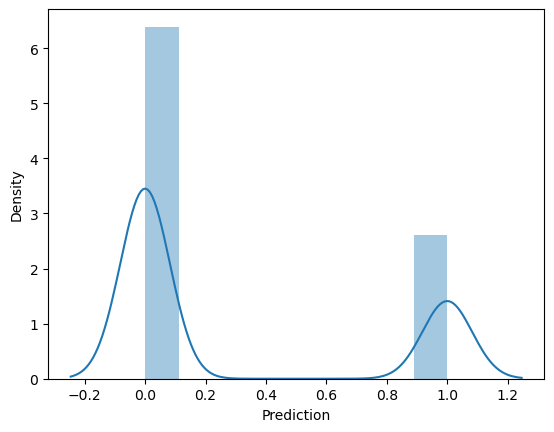

In [9]:
import seaborn as sns

sns.distplot(df.Prediction)


The distibution of data is about 0 is not spam and 1 is spam.

# Train and evaluate Naive Bayes Classifier

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score 

X = df.drop(columns=["Email No.", "Prediction"])
y = df["Prediction"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print Metrics
print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", report)

Confusion Matrix:
 [[704  35]
 [ 12 284]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.97       739
           1       0.89      0.96      0.92       296

    accuracy                           0.95      1035
   macro avg       0.94      0.96      0.95      1035
weighted avg       0.96      0.95      0.96      1035



The classification results show overall performance of the spam detection model, achieving an accuracy of 95% is very good. According to the confusion matrix, the model correctly classified 704 out of 739 non-spam emails and 284 out of 296 spam emails. Precision and recall scores are high for both classes, with non-spam (class 0) showing a precision of 0.98 and recall of 0.95, meaning very few legitimate emails are incorrectly flagged as spam. For the spam class (class 1), the model achieved a precision of 0.89 and an impressive recall of 0.96, demonstrating its ability to effectively identify most spam messages with only a small number of missed cases. While the false positive rate for spam is slightly higher, the model still maintains strong F1-scores for both classes. Overall, these results suggest that the system is reliable for real-world email filtering, with only minor room for improvement in reducing false positives.


# Test

To test this algorithm, just enter the email content and email sender address and then the algorithm will print the result


In [15]:
email_content = input("content of the email: ")
sender_address = input("sender of the email: ")


spam_domains = ['test.com', 'uuuu.oo', 'fake.net', 'wwww.com']
match = re.search(r'@([A-Za-z0-9.-]+)', sender_address)
domain = match.group(1).lower() if match else ''
 
if sender_address in spam_domains:
    print("sender is spam")
        
else:    
    email_content = email_content.lower()  
    tokens = word_tokenize(email_content)  
    token_counts = Counter(tokens)  

    df = pd.DataFrame([token_counts])
    df = df.reindex(columns=X.columns, fill_value=0) 

    prediction = model.predict(df)
    if prediction[0] == 1: 
        print("Spam") 
    else: 
        print("Not Spam")


content of the email: yy
sender of the email: test.com
sender is spam


# Result



The Advanced Email Spam Detection System demonstrates the practical use of machine learning to improve both security and communication in digital environments. By uniting sender domain checks with detailed content evaluation, and employing the Naive Bayes Classifier, this system effectively blocks unwanted spam messages. It not only boosts the reliability and safety of email exchanges but also shields users from cyber risks. Thanks to its interpretable decision process and strong performance, this solution can be integrated seamlessly into both individual and enterprise email systems.
